In [1]:
import tensorflow as tf
import numpy
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
#import data into tensorflow dataset object
training_set=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/q/Downloads/All Data/Images_train_test/Apple/train",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 8911 files belonging to 4 classes.


In [4]:
train_class_names = training_set.class_names
train_class_names

['Apple Black rot', 'Apple Healthy', 'Apple Scab', 'Cedar Apple Rust']

In [5]:
len(training_set)

279

(256, 256, 3)


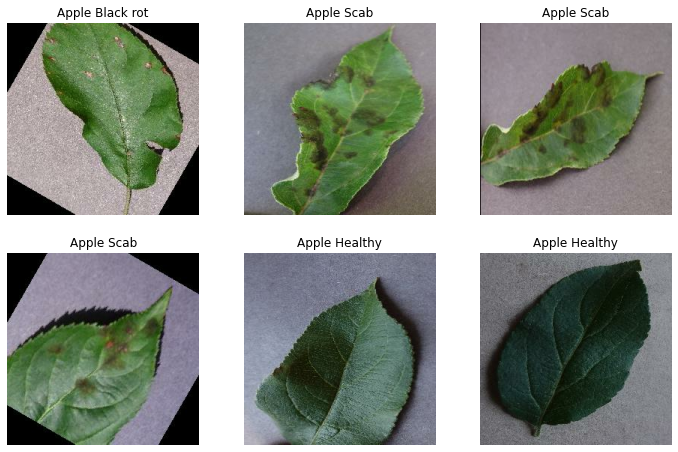

In [6]:
#let's now try to visualize our images with their label
plt.figure(figsize=(12,12))
for image_batch, label_batch in training_set.take(1):
    for i in range(6):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(train_class_names[label_batch[i]])
        #plt.title(label_batch[i].numpy())
        
        
    print(image_batch[0].shape)

In [7]:
#let's writre a function dto split our data automatically
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1,val_split = 0.1, shuffle =True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 1200)
        
    train_size = int(train_split*ds_size)
    val_size = int(ds_size*val_split)
    
    train_data = ds.take(train_size)
    val_data = ds.skip(train_size).take(val_size)
    test_data = ds.skip(train_size).skip(val_size)
    return train_data, test_data, val_data 

In [8]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(training_set)
len(train_ds), len(test_ds), len(val_ds)

(223, 29, 27)

In [9]:
#This is made to optimize the moderl performance so that tthe model trains better because of the pipeline stuff...
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
#Now let's scale our images AKA data normalization
#And also the resize layer will take care of resizing the images submitted the model during training even if they are not of size 256x256
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [11]:
#Here we will perform the data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model_apple= models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_apple.build(input_shape=input_shape)

In [13]:
model_apple.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model_apple.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=EPOCHS,
)

Epoch 1/10
223/223 [==============================] - 182s 468ms/step - loss: 0.8938 - accuracy: 0.5915 - val_loss: 0.6506 - val_accuracy: 0.7766
Epoch 2/10
223/223 [==============================] - 54s 243ms/step - loss: 0.5019 - accuracy: 0.8106 - val_loss: 0.4896 - val_accuracy: 0.8137
Epoch 3/10
223/223 [==============================] - 48s 215ms/step - loss: 0.4142 - accuracy: 0.8501 - val_loss: 0.3702 - val_accuracy: 0.8611
Epoch 4/10
223/223 [==============================] - 46s 207ms/step - loss: 0.3388 - accuracy: 0.8744 - val_loss: 0.4665 - val_accuracy: 0.8206
Epoch 5/10
223/223 [==============================] - 44s 199ms/step - loss: 0.2433 - accuracy: 0.9163 - val_loss: 0.1832 - val_accuracy: 0.9340
Epoch 6/10
223/223 [==============================] - 44s 200ms/step - loss: 0.2034 - accuracy: 0.9291 - val_loss: 0.1435 - val_accuracy: 0.9456
Epoch 7/10
223/223 [==============================] - 47s 210ms/step - loss: 0.1478 - accuracy: 0.9494 - val_loss: 0.1804 - val_a

In [15]:
#import data into tensorflow dataset object
test_set=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/q/Downloads/All Data/Images_train_test/Apple/test",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 1389 files belonging to 4 classes.


In [17]:
test_class_names = test_set.class_names
test_class_names

['Apple Black rot', 'Apple Healthy', 'Apple Scab', 'Cedar Apple Rust']

first image to predict
actual label: Apple Black rot
predicted label: Apple Black rot


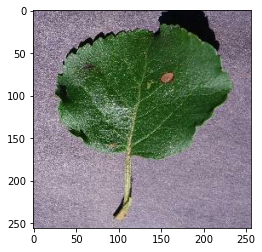

In [18]:
#Run prediction on a sample image
for images_batch, test_labels_batch in test_set.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = test_labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",train_class_names[first_label])
    
    batch_prediction = model_apple.predict(images_batch)
    print("predicted label:",test_class_names[np.argmax(batch_prediction[0])])

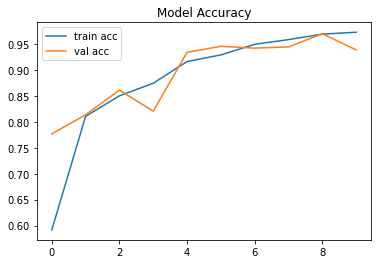

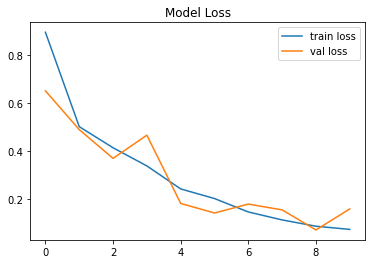

In [19]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend()
plt.show()

The Code Below Allows Us To Display Our Data's Confusion Matrix even if They Are Shuffled.

In [21]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model_apple.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
confusion_matrix(predicted_labels, correct_labels)

array([[225,   0,   3,   0],
       [  0, 224,  25,   1],
       [  1,   1, 198,   0],
       [  1,   0,  10, 239]], dtype=int64)

In [22]:
train_class_names

['Apple Black rot', 'Apple Healthy', 'Apple Scab', 'Cedar Apple Rust']

In [23]:
from sklearn.metrics import classification_report
y_true = correct_labels
y_pred = predicted_labels
target_names = train_class_names
print(classification_report(y_true, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

 Apple Black rot       0.99      0.99      0.99       227
   Apple Healthy       0.90      1.00      0.94       225
      Apple Scab       0.99      0.84      0.91       236
Cedar Apple Rust       0.96      1.00      0.98       240

        accuracy                           0.95       928
       macro avg       0.96      0.96      0.95       928
    weighted avg       0.96      0.95      0.95       928



In [24]:
#The Model eveluation we'll be used to check if the obtained accuracies are the same in both the matrix and the evaluation
model_apple.evaluate(test_ds)

29/29 [==============================] - 1s 39ms/step - loss: 0.1225 - accuracy: 0.9547


[0.1225413978099823, 0.954741358757019]

In [25]:
#This is our Confusion Matrix

In [43]:
# import libraries
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.utils.multiclass import unique_labels
import time
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.callbacks import TensorBoard

In [46]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          text_size=14,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(11,11))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    size=text_size,
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

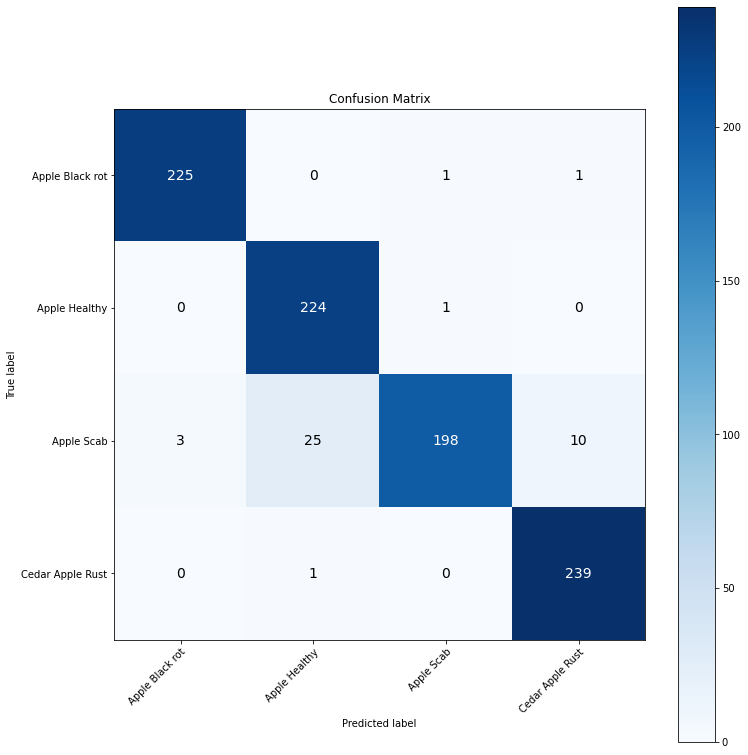

In [47]:
plot_confusion_matrix(correct_labels, predicted_labels, train_class_names, title="Confusion Matrix")

In [33]:
#Now We can save the model to reuse it later:
#j'ai oublié le code